In [1]:
!pip install scikit-fuzzy >log

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [3]:
# Definir as variáveis de entrada e saída
# UVI (Ultraviolet Index),
# Escala de Sensibilidade à Luz proposta por D. W. MacLeod (escala que mede a sensibilidade à luz do olho humano)
# e o nível de sombreamento do vidro (ação)

UVI = ctrl.Antecedent(np.arange(0,17,1), "ind_uv") # Índice ultravioleta
sensibility = ctrl.Antecedent(np.arange(0,8,1), "sensibilidade") # Sensibilidade à luz
ns = ctrl.Consequent(np.arange(0, 101, 1), "sombreamento") # Nível de sombreamento do vidro

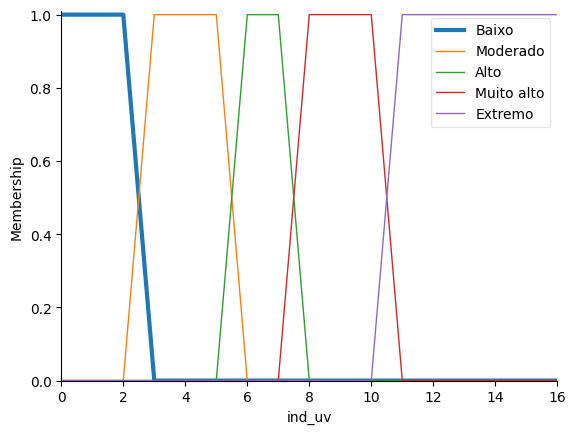

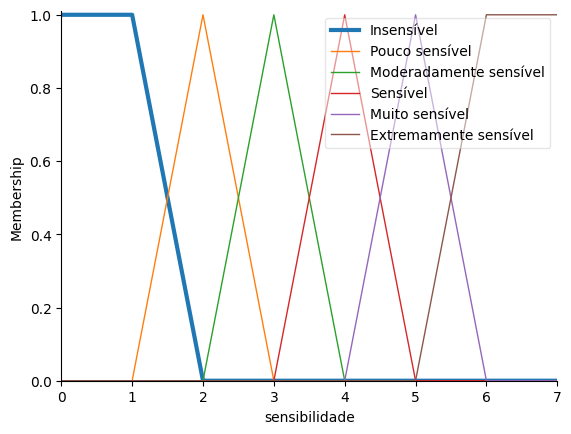

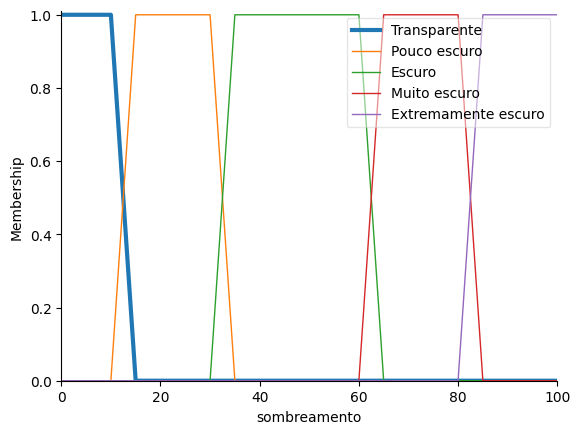

In [4]:
# Definir as funções de pertinência para as variáveis

UVI['Baixo'] = fuzz.trapmf(UVI.universe, [0, 0, 2, 3])
UVI['Moderado'] = fuzz.trapmf(UVI.universe, [2, 3, 5, 6])
UVI['Alto'] = fuzz.trapmf(UVI.universe, [5, 6, 7, 8])
UVI['Muito alto'] = fuzz.trapmf(UVI.universe, [7, 8, 10, 11])
UVI['Extremo'] = fuzz.trapmf(UVI.universe, [10, 11, 16, 16])

sensibility['Insensível'] = fuzz.trapmf(sensibility.universe, [0, 0, 1, 2])
sensibility['Pouco sensível'] = fuzz.trimf(sensibility.universe, [1, 2, 3])
sensibility['Moderadamente sensível'] = fuzz.trimf(sensibility.universe, [2, 3, 4])
sensibility['Sensível'] = fuzz.trimf(sensibility.universe, [3, 4, 5])
sensibility['Muito sensível'] = fuzz.trimf(sensibility.universe, [4, 5, 6])
sensibility['Extremamente sensível'] = fuzz.trapmf(sensibility.universe, [5, 6, 7, 7])

ns['Transparente'] = fuzz.trapmf(ns.universe, [0, 0, 10, 15])
ns['Pouco escuro'] = fuzz.trapmf(ns.universe, [10, 15, 30, 35])
ns['Escuro'] = fuzz.trapmf(ns.universe, [30, 35, 60, 65])
ns['Muito escuro'] = fuzz.trapmf(ns.universe, [60, 65, 80, 85])
ns['Extremamente escuro'] = fuzz.trapmf(ns.universe, [80, 85, 100, 100])

UVI['Baixo'].view()
sensibility['Insensível'].view()
ns['Transparente'].view()

In [5]:
# Definir as regras fuzzy
rule1 = ctrl.Rule(UVI['Baixo'] & (sensibility['Insensível'] | sensibility['Pouco sensível']), ns['Transparente'])
rule2 = ctrl.Rule(UVI['Baixo'] & (sensibility['Moderadamente sensível'] | sensibility['Sensível']), ns['Pouco escuro'])
rule3 = ctrl.Rule(UVI['Baixo'] & (sensibility['Muito sensível'] | sensibility['Extremamente sensível']), ns['Escuro'])

rule4 = ctrl.Rule(UVI['Moderado'] & sensibility['Insensível'], ns['Transparente'])
rule5 = ctrl.Rule(UVI['Moderado'] & sensibility['Pouco sensível'], ns['Pouco escuro'])
rule6 = ctrl.Rule(UVI['Moderado'] & (sensibility['Moderadamente sensível'] | sensibility['Sensível']), ns['Escuro'])
rule7 = ctrl.Rule(UVI['Moderado'] & (sensibility['Muito sensível'] | sensibility['Extremamente sensível']), ns['Muito escuro'])

rule8 = ctrl.Rule(UVI['Alto'] & sensibility['Insensível'], ns['Pouco escuro'])
rule9 = ctrl.Rule(UVI['Alto'] & sensibility['Pouco sensível'], ns['Escuro'])
rule10 = ctrl.Rule(UVI['Alto'] & (sensibility['Moderadamente sensível'] | sensibility['Sensível']), ns['Muito escuro'])
rule11 = ctrl.Rule(UVI['Alto'] & (sensibility['Muito sensível'] | sensibility['Extremamente sensível']), ns['Extremamente escuro'])

rule12 = ctrl.Rule(UVI['Muito alto'] & sensibility['Insensível'], ns['Escuro'])
rule13 = ctrl.Rule(UVI['Muito alto'] & sensibility['Pouco sensível'], ns['Muito escuro'])
rule14 = ctrl.Rule(UVI['Muito alto'] & (sensibility['Moderadamente sensível'] | sensibility['Sensível'] | sensibility['Muito sensível'] | sensibility['Extremamente sensível']), ns['Extremamente escuro'])

rule15 = ctrl.Rule(UVI['Extremo'] & sensibility['Insensível'], ns['Muito escuro'])
rule16 = ctrl.Rule(UVI['Extremo'] & (sensibility['Pouco sensível'] | sensibility['Moderadamente sensível'] | sensibility['Sensível'] | sensibility['Muito sensível'] | sensibility['Extremamente sensível']), ns['Extremamente escuro'])

In [6]:
# Criar o sistema de controle fuzzy
ns_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16])
final_ns = ctrl.ControlSystemSimulation(ns_ctrl)

In [7]:
# Função que determina o nível de transparência do vidro
def printResult(ns_level):
  if ns_level < 10:
    response = "Transparente"
  elif ns_level < 30:
    response = 'Pouco escuro'
  elif ns_level < 65:
    response = "Escuro"
  elif ns_level < 90:
    response = "Muito escuro"
  else:
    response = "Extremamente escuro"

  print(f"O sistema retornou uma porcentagem de nível do sombreamento do vidro igual a {ns_level}")
  print(f"Essa porcentagem corresponde ao escuremento {response}")

O sistema retornou uma porcentagem de nível do sombreamento do vidro igual a 6.333333333333334
Essa porcentagem corresponde ao escuremento Transparente


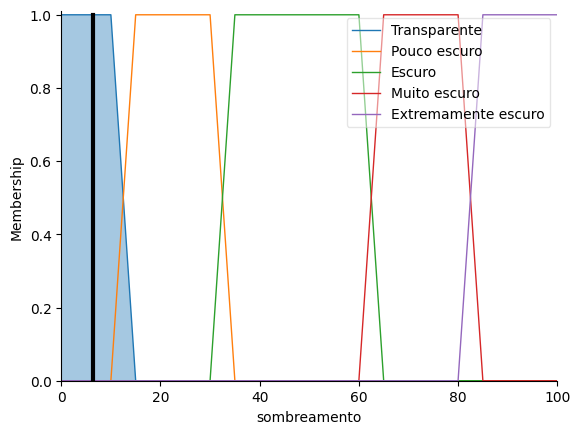

In [8]:
# Exemplo para o vidro com escurecimento Transparente
final_ns.input['ind_uv'] = 1
final_ns.input['sensibilidade'] = 2
final_ns.compute()
ns_level = final_ns.output['sombreamento']

printResult(ns_level)

ns.view(sim=final_ns)

O sistema retornou uma porcentagem de nível do sombreamento do vidro igual a 22.500000000000007
Essa porcentagem corresponde ao escuremento Pouco escuro


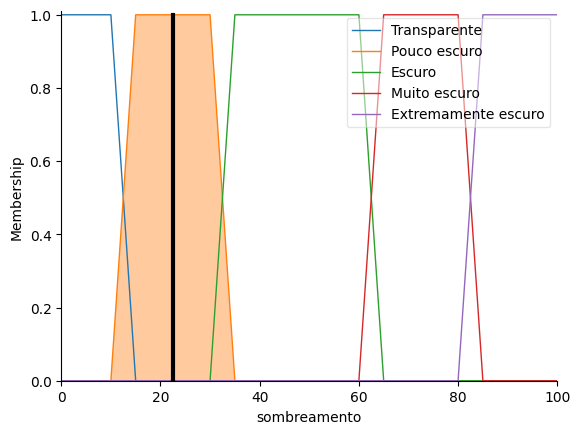

In [9]:
# Exemplo para o vidro com escurecimento Pouco escuro
final_ns.input['ind_uv'] = 3
final_ns.input['sensibilidade'] = 2
final_ns.compute()
ns_level = final_ns.output['sombreamento']

printResult(ns_level)

ns.view(sim=final_ns)

O sistema retornou uma porcentagem de nível do sombreamento do vidro igual a 47.5
Essa porcentagem corresponde ao escuremento Escuro


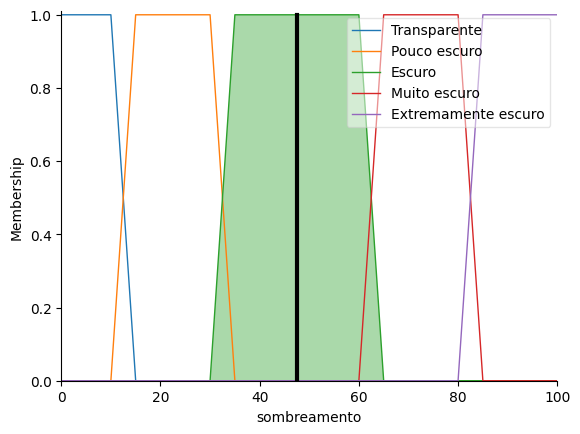

In [10]:
# Exemplo para o vidro com escurecimento Escuro
final_ns.input['ind_uv'] = 5
final_ns.input['sensibilidade'] = 3
final_ns.compute()
ns_level = final_ns.output['sombreamento']

printResult(ns_level)

ns.view(sim=final_ns)

O sistema retornou uma porcentagem de nível do sombreamento do vidro igual a 72.50000000000001
Essa porcentagem corresponde ao escuremento Muito escuro


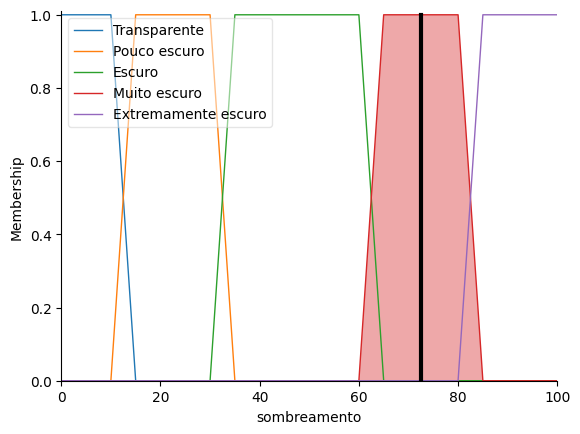

In [ ]:
# Exemplo para o vidro com escurecimento Muito escuro
final_ns.input['ind_uv'] = 6
final_ns.input['sensibilidade'] = 3
final_ns.compute()
ns_level = final_ns.output['sombreamento']

printResult(ns_level)

ns.view(sim=final_ns)

O sistema retornou uma porcentagem de nível do sombreamento do vidro igual a 91.1904761904762
Essa porcentagem corresponde ao escuremento Extremamente escuro


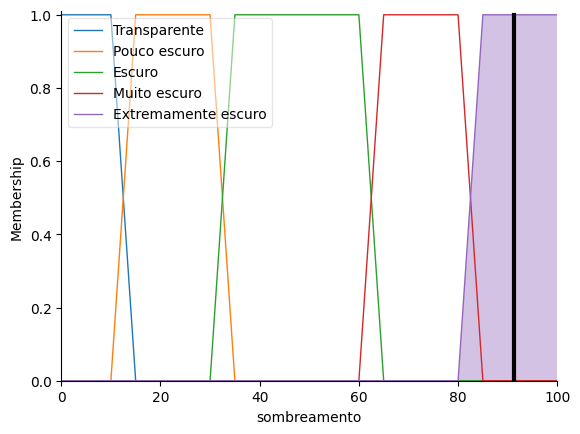

In [ ]:
# Exemplo para o vidro com escurecimento Extremamente escuro
final_ns.input['ind_uv'] = 6
final_ns.input['sensibilidade'] = 5
final_ns.compute()
ns_level = final_ns.output['sombreamento']

printResult(ns_level)

ns.view(sim=final_ns)